# Multiple Linear Regression

When we want to understand the relationship between a quantitative variable and two or more predictor variables, we use multiple linear regression. In multiple linear regression, the response variable must be quantitative, while the predictors may be either quantitative, categorical, or a mix of both. For example, we might ask:

* How is blood pressure associated with exercise and anxiety level?
* What is the relationship between happiness scores and income level, family size, and marital status?

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

student = pd.read_csv('09b_student.csv')
student.head()

,index,address,age,math1,math2,math3,port1,port2,port3
0,0,R,15,3.5,5.0,5.0,6.5,6.5,6.5
1,1,R,15,4.0,3.0,2.5,6.5,5.5,5.5
2,2,R,15,7.0,6.5,6.5,7.0,6.5,6.0
3,3,R,15,5.0,4.5,4.0,5.0,5.5,5.0
4,4,R,15,5.0,5.0,5.0,6.5,6.5,6.5


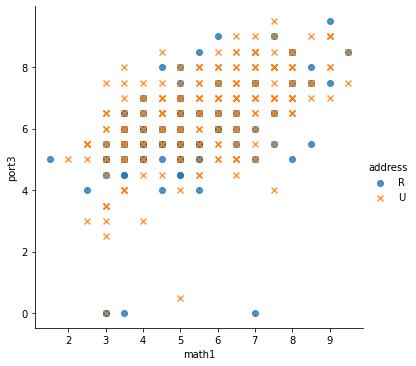

In [3]:
sns.lmplot(x='math1', y='port3', hue='address', markers=['o', 'x'], fit_reg=False, data=student)
plt.show()

## Multiple Regression Equation

Formal equation:

y = b0 + b1*x1 + b2*x2 + ... + bi*xi

where:

* y is response variable
* b0 is the intercept
* bi is the coefficient of the ith predictor variable

example:

score = b0 + b1 * hours_studied + b2 * had_breakfast



In [4]:
import statsmodels.api as sm

model1 = sm.OLS.from_formula('port3 ~ math1 + address', data=student).fit()

print(model1.params)

Intercept       3.234071
address[T.U]    0.557631
math1           0.475892
dtype: float64


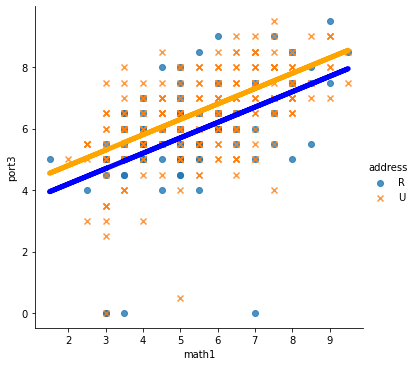

In [5]:
import numpy as np

interceptR = 3.2
interceptU = np.round(3.234071 + 0.557631, 1)
slope = 0.5

# Add lines to complete scatter plot and display
sns.lmplot(x='math1', y='port3', hue='address', markers=['o', 'x'], fit_reg=False, data=student)
# Line for rural addresses (R)
plt.plot(student.math1, interceptR + slope * student.math1, color='blue',linewidth=5)
# Line for urban addresses (U)
plt.plot(student.math1, interceptU + slope * student.math1, color='orange',linewidth=5)
plt.show()

In the previous exercises, we looked at regression models with one quantitative predictor and one binary predictor, but we can also have models with multiple quantitative predictors. For example, consider the following model using the student dataset (port1 is the score that the student got on the first portuguese score).

This is difficult to visualize, so it's helpful to choose a few sample values (e.g. 4, 6, 8 port1 scores)

Intercept    0.440159
math1        0.111161
port1        0.860927
dtype: float64


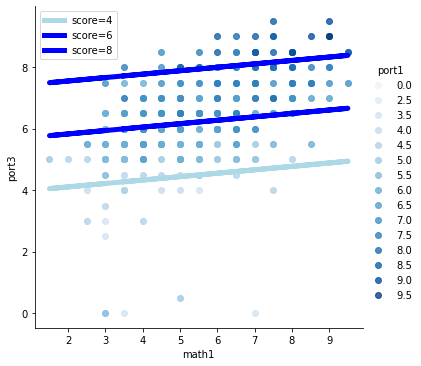

In [6]:
model2 = sm.OLS.from_formula('port3 ~ math1 + port1', data=student).fit()
print(model2.params)

sns.lmplot(x='math1', y='port3', hue='port1', palette='Blues', fit_reg=False, data=student)

plt.plot(student.math1, model2.params[0]+model2.params[1]*student.math1+model2.params[2]*4, color='lightblue', linewidth=5)
plt.plot(student.math1, model2.params[0]+model2.params[1]*student.math1+model2.params[2]*6, color='blue', linewidth=5)
# Add third line to scatter plot here:
plt.plot(student.math1, model2.params[0]+model2.params[1]*student.math1+model2.params[2]*8, color='blue', linewidth=5)


plt.legend(['score=4','score=6','score=8'])
plt.show()

## Simpson's Paradox

When adding predictors entirely reverses the sign of the coefficient, this is called Simpson’s Paradox: one model says the direction of the relationship is positive, while the other says it is negative.

Intercept    1089.293718
expend        -20.892174
dtype: float64
Intercept    996.329849
expend        11.737303
takingR       -2.809061
dtype: float64


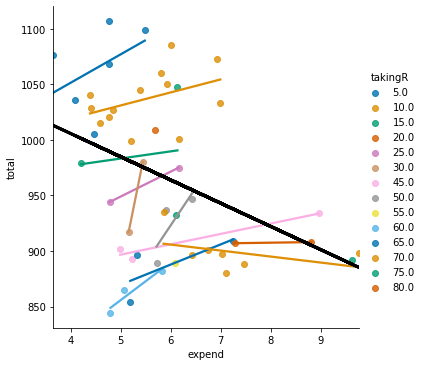

In [7]:
sat = pd.read_csv('09b_sat_scores.csv')

model0 = sm.OLS.from_formula('total ~ expend', data=sat).fit()

# This would indicate that the higher the expenditure per pupil (in thousands of dollars), the lower the sat scores:
print(model0.params)

# Now let's take into consideration the percentage of students taking the SAT.
# We now see that there's a positive correlation between expenditure and SAT scores.
model1 = sm.OLS.from_formula('total ~ expend + takingR', data=sat).fit()
print(model1.params)

sns.lmplot(x='expend', y='total', hue='takingR', palette='colorblind', ci=None, data=sat)
plt.plot(sat.expend, model0.params[0] + model0.params[1]*sat.expend, color='black', linewidth=3, label='Only Expend')

plt.show()

## Assumptions

Multiple linear regression requires some of the same assumptions as simple linear regression:

* Linear functional form, which can be assessed by plotting the outcome variable against the predictor variable and looking for a linear relationship
* Normality, which can be assessed by plotting a histogram of the residuals and looking for an approximately normal distribution
* Homoscedasticity, which can be assessed by plotting residuals against fitted values and confirming that there is no clear pattern

In addition, we also have to check that the predictors are not linearly related. This is referred to as multicollinearity and can lead to misleading results. For example, rooms and areas of a house can be closely (and linearly) related (e.g. corr = 0.95), so we might decide to keep only one of those 2 variables in order to avoid multicollinearity.

          index       age     math1     math2     math3     port1     port2  \
index  1.000000  0.547105  0.059607  0.008509 -0.005933 -0.205348 -0.175041   
age    0.547105  1.000000 -0.117486 -0.175370 -0.194589 -0.109549 -0.042010   
math1  0.059607 -0.117486  1.000000  0.860395  0.805129  0.568008  0.588829   
math2  0.008509 -0.175370  0.860395  1.000000  0.903027  0.525944  0.569656   
math3 -0.005933 -0.194589  0.805129  0.903027  1.000000  0.495305  0.535552   
port1 -0.205348 -0.109549  0.568008  0.525944  0.495305  1.000000  0.887906   
port2 -0.175041 -0.042010  0.588829  0.569656  0.535552  0.887906  1.000000   
port3 -0.209595 -0.067977  0.550844  0.507500  0.480349  0.819048  0.892444   

          port3  
index -0.209595  
age   -0.067977  
math1  0.550844  
math2  0.507500  
math3  0.480349  
port1  0.819048  
port2  0.892444  
port3  1.000000  


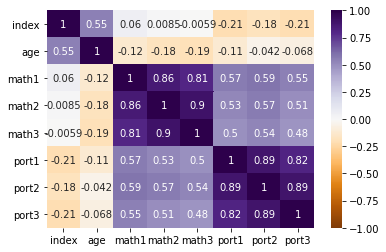

In [9]:
# Correlations for pairs of quantitative variables in student:

corrs = student.corr()
print(corrs)

# Heat map of the correlations

sns.heatmap(corrs, xticklabels=corrs.columns, yticklabels=corrs.columns, vmin=-1, center=0, vmax=1, cmap='PuOr', annot=True)
plt.show()

In [10]:
plants = pd.read_csv('09_plants.csv')
model = sm.OLS.from_formula('growth ~ water + fertilizer + water:fertilizer', data=plants).fit()

print(model.params)

# Equation based on the model coefficients is:
# growth = 5.904379 + 1.860867 * water - 1.196669 * fertilizer + 0.774034 * water * fertilizer

Intercept           5.904379
water               1.860867
fertilizer         -1.196669
water:fertilizer    0.774034
dtype: float64


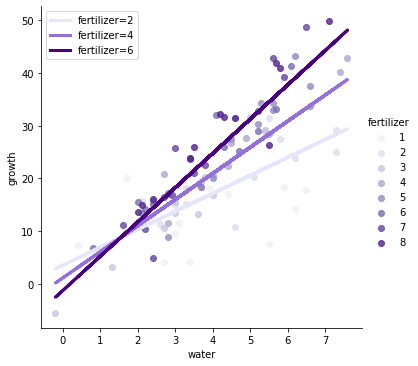

In [15]:
# Scatter plots

sns.lmplot(x='water', y='growth', hue='fertilizer', palette='Purples', fit_reg=False, data=plants)

plt.plot(plants.water, model.params[0] + model.params[1]*plants.water+ model.params[2]*2 + model.params[3]*plants.water*2, color='lavender', linewidth=3)
plt.plot(plants.water, model.params[0] + model.params[1]*plants.water+ model.params[2]*4 + model.params[3]*plants.water*4, color='mediumpurple', linewidth=3, label='fertilizer=4')
plt.plot(plants.water, model.params[0] + model.params[1]*plants.water+ model.params[2]*6 + model.params[3]*plants.water*6, color='indigo', linewidth=3, label='fertilizer=4')

plt.legend(['fertilizer=2','fertilizer=4','fertilizer=6'])
plt.show()

In [17]:
# Same data, but using polynomial terms

model = sm.OLS.from_formula('dead ~ light + np.power(light,2)', data=plants).fit()
print(model.params)

# Equation based on the model coefficients is:
# dead = 52.2 - 7.4 * light + 0.3 * light^2

Intercept             52.170841
light                 -7.371327
np.power(light, 2)     0.273966
dtype: float64


In [19]:
numDead10 = model.params[0] + model.params[1]*10 + model.params[2]*np.power(10,2)
print(numDead10)

numDead18 = model.params[0] + model.params[1]*18 + model.params[2]*np.power(18,2)
print(numDead18)

5.854132869156075
8.251822731513016


Intercept    30.719176
light        -1.635004
dtype: float64
Intercept             52.170841
light                 -7.371327
np.power(light, 2)     0.273966
dtype: float64


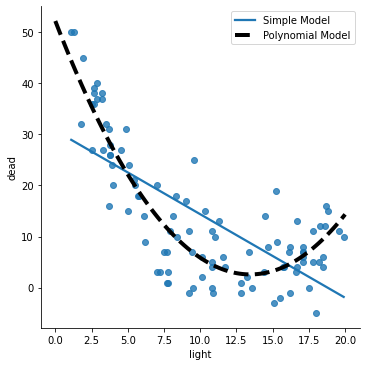

In [22]:
simple = sm.OLS.from_formula('dead ~ light', data=plants).fit()
polynomial = sm.OLS.from_formula('dead ~ light + np.power(light,2)', data=plants).fit()

print(simple.params)

print(polynomial.params)

sns.lmplot(x='light', y='dead', ci=None, data=plants)
x=np.linspace(0,20,100)
y=polynomial.params[0]+polynomial.params[1]*x+polynomial.params[2]*np.power(x,2)
plt.plot(x, y, linestyle='dashed', linewidth=4, color='black')
plt.legend(['Simple Model','Polynomial Model'])
plt.show()